**Table of contents**<a id='toc0_' numbering=true></a><a id='toc0_'></a>    
- 1. [Executive Summary - MA](#toc1_)    
- 2. [Introduction - MA](#toc2_)    
    - 2.1.1. [Understand variables and potential data cleaning](#toc2_1_1_)    
- 3. [Exploratory Data Analysis - NI](#toc3_)    
  - 3.1. [Descriptive Statistics of Individual Variables](#toc3_1_)    
    - 3.1.1. [Descriptive Statistics of Nominal Variables](#toc3_1_1_)    
    - 3.1.2. [Descriptive Statistics of Continious Variables](#toc3_1_2_)    
  - 3.2. [Descriptive Statistics of Correlations](#toc3_2_)    
- 4. [...? - MO](#toc4_)    
  - 4.1. [Two sample t-test - One-sided](#toc4_1_)    
  - 4.2. [Logistic Regression](#toc4_2_)    
    - 4.2.1. [Model-based t-test and EDA](#toc4_2_1_)    
    - 4.2.2. [Model Lasslo L1 Regularization](#toc4_2_2_)    
    - 4.2.3. [Interpreting the Outcome](#toc4_2_3_)    
      - 4.2.3.1. [R Squared (Goodness-of-fit)](#toc4_2_3_1_)    
      - 4.2.3.2. [Confusion Matrix and Accuaracy (Goodness-of-fit)](#toc4_2_3_2_)    
      - 4.2.3.3. [Odds Ratio](#toc4_2_3_3_)    
- 5. [What factors influence the years at company of attrition employees in in medium sized organisations?](#toc5_)    
  - 5.1. [Linear Regression - MO](#toc5_1_)    
    - 5.1.1. [Model - MO](#toc5_1_1_)    
    - 5.1.2. [Assumptions Checking - MO](#toc5_1_2_)    
      - 5.1.2.1. [Linearity - MO](#toc5_1_2_1_)    
      - 5.1.2.2. [Homoscedacsity - MO](#toc5_1_2_2_)    
      - 5.1.2.3. [Normality of Residuals - NI](#toc5_1_2_3_)    
      - 5.1.2.4. [Multicollinearity - NI](#toc5_1_2_4_)    
      - 5.1.2.5. [Independence of Errors (autocorrelation of errors) - NI](#toc5_1_2_5_)    
- 6. [Conclusion - MA](#toc6_)

# 1. <a id='toc1_'></a>[Executive Summary](#toc0_)

**Project Goal** bla bla bla

**Key Findings** bla bla bla

# 2. <a id='toc2_'></a>[Introduction](#toc0_)

In the following, we will use the **dataset "HR-Data"** from -, _ (Source: [link](link)). bla bla:

- `Age`: The employee’s age.  
- `Attrition`: Whether the employee has left the company (Yes/No).  
- `BusinessTravel`: Frequency of business travel (e.g., Rarely, Frequently, None).  
- `DailyRate`: Daily rate of pay.  
- `Department`: The department where the employee works (e.g., Sales, HR, R&D).  
- `DistanceFromHome`: Distance between home and workplace (in kilometers).  
- `Education`: Level of education (e.g., High School, Bachelor, Master).  
- `EducationField`: Field of education (e.g., Life Sciences, Engineering).  
- `EmployeeCount`: Number of employees (often a constant in some datasets).  
- `EmployeeNumber`: Unique identifier for the employee.  
- `EnvironmentSatisfaction`: Satisfaction with the work environment (scale).  
- `Gender`: Gender of the employee.  
- `HourlyRate`: Hourly rate of pay.  
- `JobInvolvement`: Level of job involvement (scale).  
- `JobLevel`: Job level or position level.  
- `JobRole`: Job role (e.g., Sales Executive, Research Scientist).  
- `JobSatisfaction`: Satisfaction with the job (scale).  
- `MaritalStatus`: Marital status (e.g., Single, Married).  
- `MonthlyIncome`: Monthly income.  
- `MonthlyRate`: Monthly rate of pay (payroll rate).  
- `NumCompaniesWorked`: Number of previous companies the employee has worked at.  
- `Over18`: Whether the employee is over 18 years old (often a constant).  
- `OverTime`: Whether the employee works overtime (Yes/No).  
- `PercentSalaryHike`: Percentage salary increase.  
- `PerformanceRating`: Performance rating (scale).  
- `RelationshipSatisfaction`: Satisfaction with workplace relationships (scale).  
- `StandardHours`: Standard working hours (often a constant, e.g., 40 hours/week).  
- `StockOptionLevel`: Stock option level.  
- `TotalWorkingYears`: Total years of professional experience.  
- `TrainingTimesLastYear`: Number of training sessions attended last year.  
- `WorkLifeBalance`: Satisfaction with work–life balance (scale).  
- `YearsAtCompany`: Number of years at the current company.  
- `YearsInCurrentRole`: Number of years in the current role.  
- `YearsSinceLastPromotion`: Number of years since the last promotion.  
- `YearsWithCurrManager`: Number of years with the current manager.  


**Research Questions & Hypotheses**
bla bla

1. **Question** bla bla bla

**T-test Hypotheses**:
    
bla bla

**Logistic Regression Hypotheses**:

   bla bla

    


Importing all neccessary libaries and packages

In [86]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns


### 2.1.1. <a id='toc2_1_1_'></a>[Understand variables and potential data cleaning](#toc0_)
- WEWRIGHT: Understand dataset structure, check missing values, understand variable types
- FIXME: Check unique values and convert binominal values to 0 and 1

In [87]:
hr_data = pd.read_csv('HR-Employee-Attrition.csv')

# Showing dataset
hr_data.head(100)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,No,Travel_Rarely,1217,Research & Development,2,4,Technical Degree,1,126,...,1,80,1,16,5,1,4,3,0,3
96,24,No,Travel_Rarely,1353,Sales,3,2,Other,1,128,...,1,80,1,4,2,2,3,2,0,2
97,28,No,Non-Travel,120,Sales,4,3,Medical,1,129,...,2,80,0,5,3,4,5,4,0,4
98,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,...,3,80,0,38,1,2,37,10,1,8


REWRITE: General information about the dataset, number of missing values and variable types.

In [88]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

WEWRITE1. Dataset has `20` attributes and `3,333` rows.
2. There are no missing values which `non-null` indicates.
3. The different `types`of variables are shown in the last column
4. The variable names are not following best practice in coding hence we rename the variable

In [89]:
# Checking missing values again
if hr_data.isnull().sum().sum()==0:
    print('There are no missing values')
else:
    print('There are missing values')

There are no missing values


There are no missing values

Checking unique values for all nominal variables

In [90]:
# Find unique values of all nominal variables
nominal_variables = ['Attrition', ]

for column in nominal_variables:
    print(f"There are following unique values in '{column}' column:\n {hr_data[column].unique()}\n")

There are following unique values in 'Attrition' column:
 ['Yes' 'No']



FIXME: WEWRITE


Next we will convert the binominal values to `0` and `1`, to be coherent

In [91]:
hr_data['Attrition'] = hr_data['Attrition'].map({'No': 0, 'Yes': 1})
hr_data['OverTime'] = hr_data['OverTime'].map({'No': 0, 'Yes': 1})
hr_data['Over18'] = (hr_data['Over18'] == 'Y').astype(int)

hr_data_medium_sized = hr_data[(hr_data['EmployeeNumber'] >= 50) & (hr_data['EmployeeNumber'] <= 250)]

# Create second data set only with churners for the second research question
attritioned_employees_df = hr_data_medium_sized[hr_data_medium_sized['Attrition'] == 1]

# 3. <a id='toc3_'></a>[Exploratory Data Analysis](#toc0_)

## 3.1. <a id='toc3_1_'></a>[Descriptive Statistics of Individual Variables](#toc0_)

### 3.1.1. <a id='toc3_1_1_'></a>[Descriptive Statistics of Nominal Variables](#toc0_)

As `attrition` is our dependent variable, we would like to see the absolute and relative distribution of customers who have left among the nominal variables.

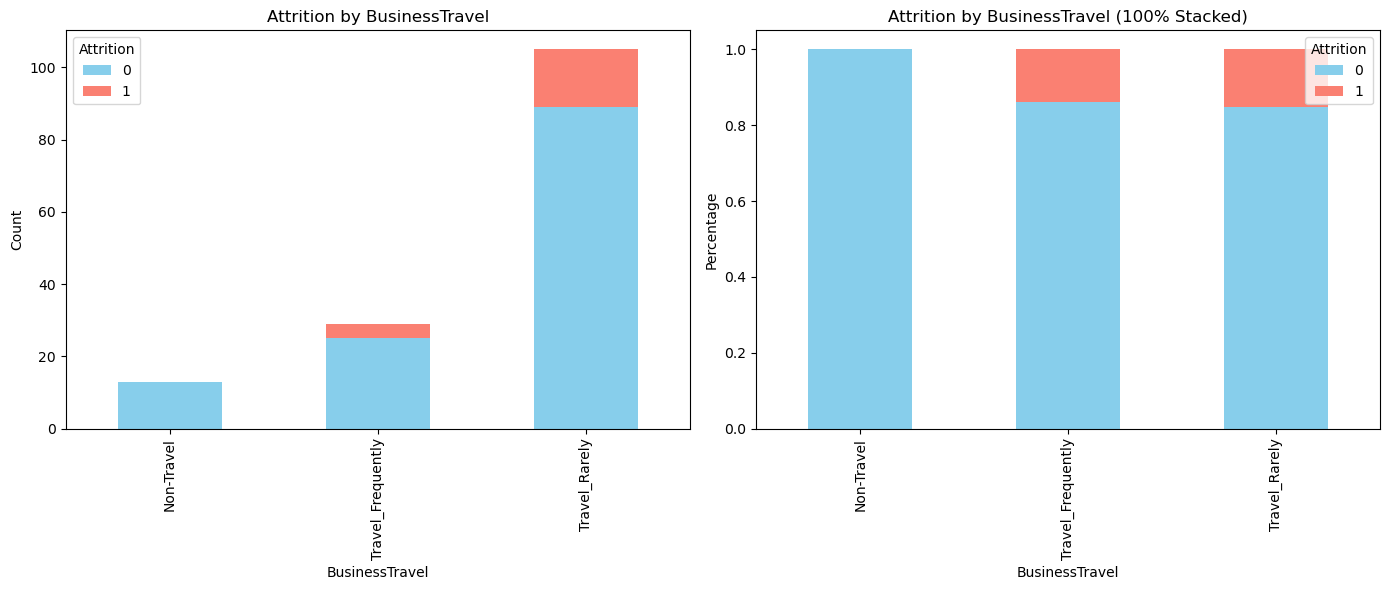

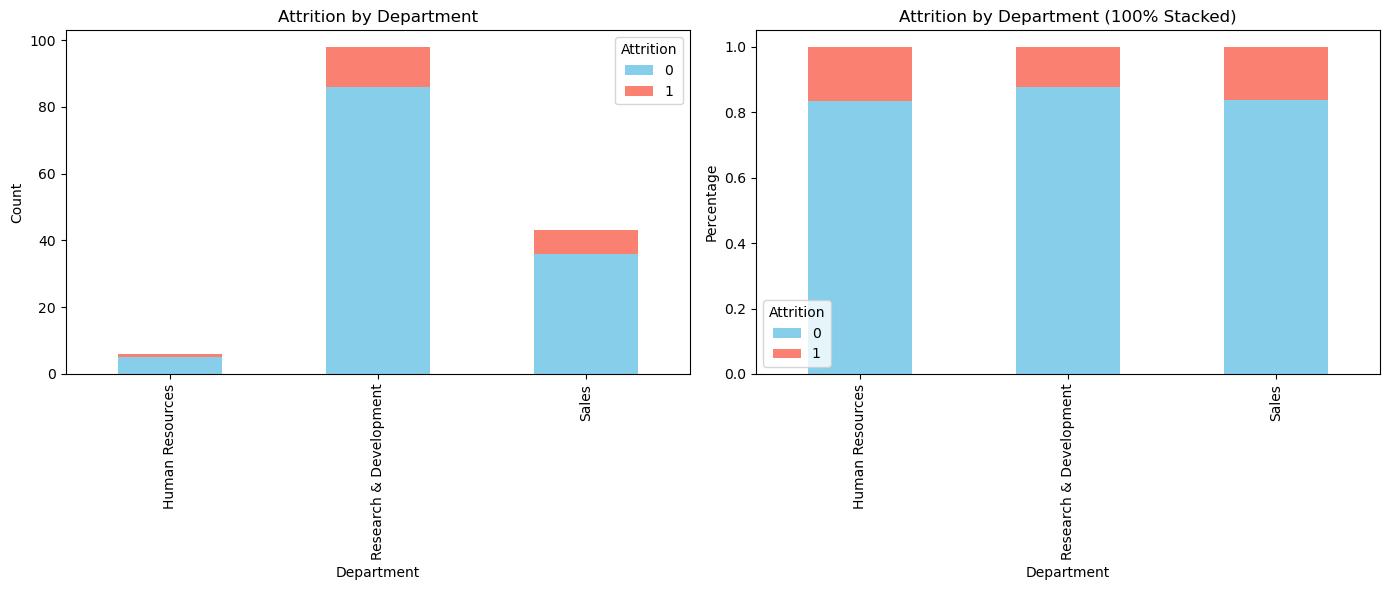

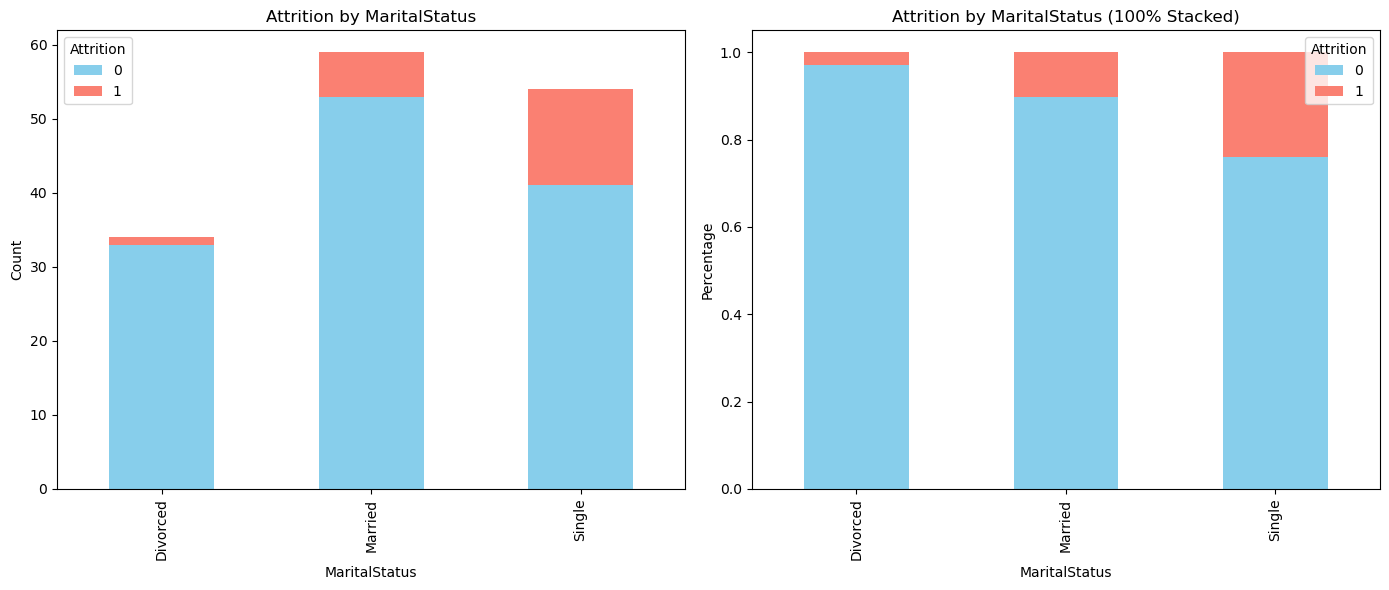

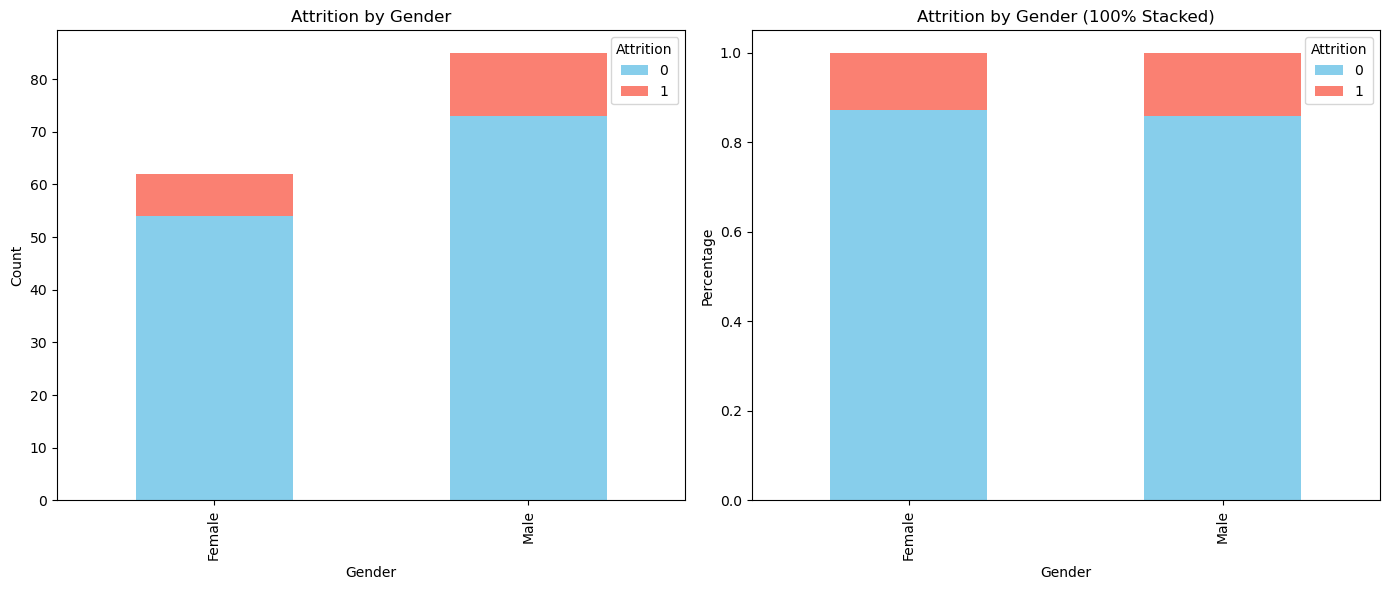

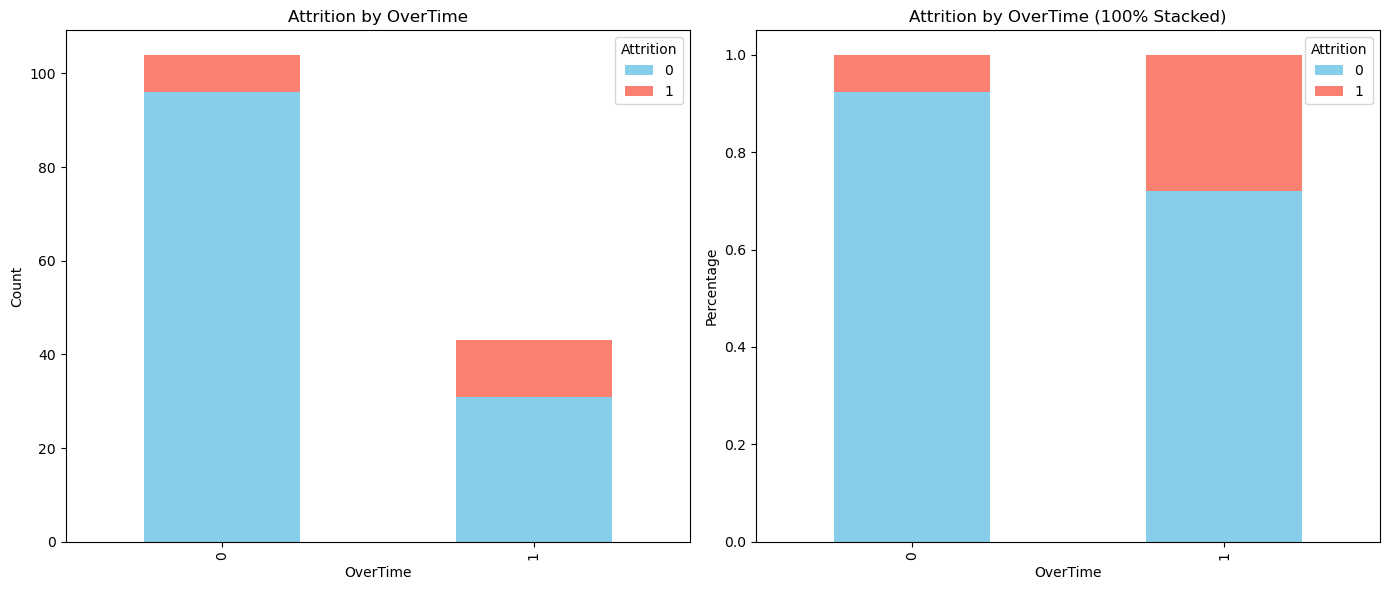

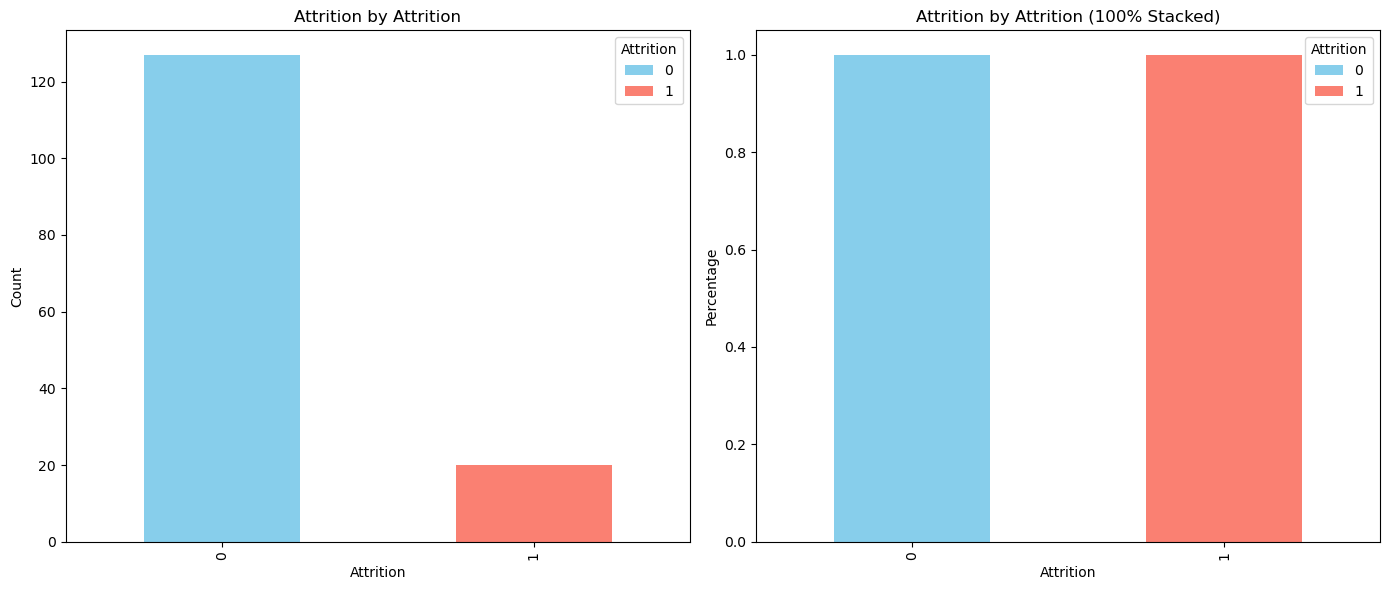

In [92]:
# REWRITE: Stacked bar graphs for churn counts by area code, voice mail plan, international plan, state and state region
def bar_grouped_by_attrition(independent_variable):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    attrition_variable = hr_data_medium_sized.groupby([independent_variable, 'Attrition']).size().unstack()
    attrition_variable.plot(kind='bar', stacked=True, ax=axes[0], color=['skyblue', 'salmon'])
    axes[0].set_title(f'Attrition by {independent_variable}')
    axes[0].set_xlabel(f'{independent_variable}')
    axes[0].set_ylabel('Count')
    axes[0].legend(title='Attrition')
    
    attrition_variable_pct = attrition_variable.div(attrition_variable.sum(axis=1), axis=0)
    attrition_variable_pct.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=axes[1])
    axes[1].set_title(f'Attrition by {independent_variable} (100% Stacked)')
    axes[1].set_xlabel(f'{independent_variable}')
    axes[1].set_ylabel('Percentage')
    axes[1].legend(title='Attrition')
    
    plt.tight_layout()
    plt.show()

for i in ['BusinessTravel', 'Department', 'MaritalStatus', 'Gender', 'OverTime', 'Attrition']:
    bar_grouped_by_attrition(i)

**Interpretation:** 
The output reveals an imbalanced dataset, with the majority of employees remaining with the company and only around 15–20% experiencing attrition. This indicates that most employees remain with the organisation.

Examining the distribution of variables, we see that most employees rarely travel for business, work in Research & Development and are married. Sales and Human Resources represent smaller groups compared to Research & Development. Additionally, most employees do not work overtime and there is a slight male bias in the gender distribution.

The stacked bar graphs provide a comprehensive view of employee attrition across categorical variables. Employees who travel frequently for business have a relatively high attrition rate (around 15–20%), compared to those who rarely or never travel for business, suggesting that frequent travel may lead to job dissatisfaction or stress. Attrition rates are also higher in Sales and Human Resources than in Research & Development, suggesting that role-specific pressures or job conditions may contribute to turnover.

There are interesting patterns in the data relating to marital status: single employees exhibit the highest relative attrition rate, followed by married employees, while divorced employees show almost no attrition. This suggests that life stage or personal responsibilities could influence turnover behaviour. Conversely, gender does not appear to influence attrition rates, as both male and female employees show nearly identical proportions of leaving.

The strongest effect is observed with overtime: employees working overtime have a significantly higher attrition rate (around 30%) than those without overtime obligations (around 10%). This suggests that workload and work-life balance are key drivers of turnover in this dataset.

### 3.1.2. <a id='toc3_1_2_'></a>[Descriptive Statistics of Continious Variables](#toc0_)

In [93]:
# Calculate summary statistics
summary_stats = hr_data_medium_sized.describe().T[['count', 'mean','50%','std', 'min', 'max', '25%', '75%',]]

# Rename the columns for clarity
summary_stats.columns = ['N', 'Mean', 'Median', 'S.D.','Min','Max','25th Quantile', '75th Quantile']

# Print the summary table
summary_stats = np.round(summary_stats, 2)
summary_stats

,N,Mean,Median,S.D.,Min,Max,25th Quantile,75th Quantile
Age,147.0,37.44,35.0,10.14,19.0,59.0,30.0,45.0
Attrition,147.0,0.14,0.0,0.34,0.0,1.0,0.0,0.0
DailyRate,147.0,853.01,852.0,412.77,111.0,1496.0,529.0,1220.0
DistanceFromHome,147.0,9.01,6.0,8.08,1.0,29.0,2.0,12.0
Education,147.0,2.89,3.0,1.03,1.0,5.0,2.0,4.0
EmployeeCount,147.0,1.00,1.0,0.00,1.0,1.0,1.0,1.0
EmployeeNumber,147.0,148.47,147.0,59.22,51.0,250.0,97.5,199.5
EnvironmentSatisfaction,147.0,2.58,3.0,0.99,1.0,4.0,2.0,3.0
HourlyRate,147.0,63.54,63.0,21.25,30.0,100.0,46.0,79.0
JobInvolvement,147.0,2.66,3.0,0.68,1.0,4.0,2.0,3.0


**Interpretation:** 
The mean and median values for most variables, such as Age, DistanceFromHome and PercentSalaryHike, are relatively close, suggesting approximately symmetrical distribution. However, several variables show clear right-skewness, with the mean being substantially higher than the median. Examples of this include MonthlyIncome (mean ≈ 6,503 vs. median ≈ 4,919), MonthlyRate (mean ≈ 14,313 vs. median ≈ 14,236) and TotalWorkingYears (mean ≈ 11.3 vs. median ≈ 10). This skewness is to be expected given the nature of income- and career-related data, where a small number of employees earn significantly more or have much longer tenures.

Some variables are constants, such as EmployeeCount (always 1) and StandardHours (always 80), which have no informational value for predictive modelling. The 'Over18' variable also lacks variability, as all entries are '1'.

Notably, satisfaction and involvement measures (e.g. EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction) range from 1 to 4, with a mean of around 2.7, suggesting moderate average satisfaction levels. Performance-related scores, such as PerformanceRating, are tightly distributed around 3, indicating little variance in employee performance ratings.

While most variables fall within reasonable ranges without extreme outliers overall, the presence of skewed distributions in monetary and tenure-related attributes highlights the need for transformations or robust methods when modelling attrition.

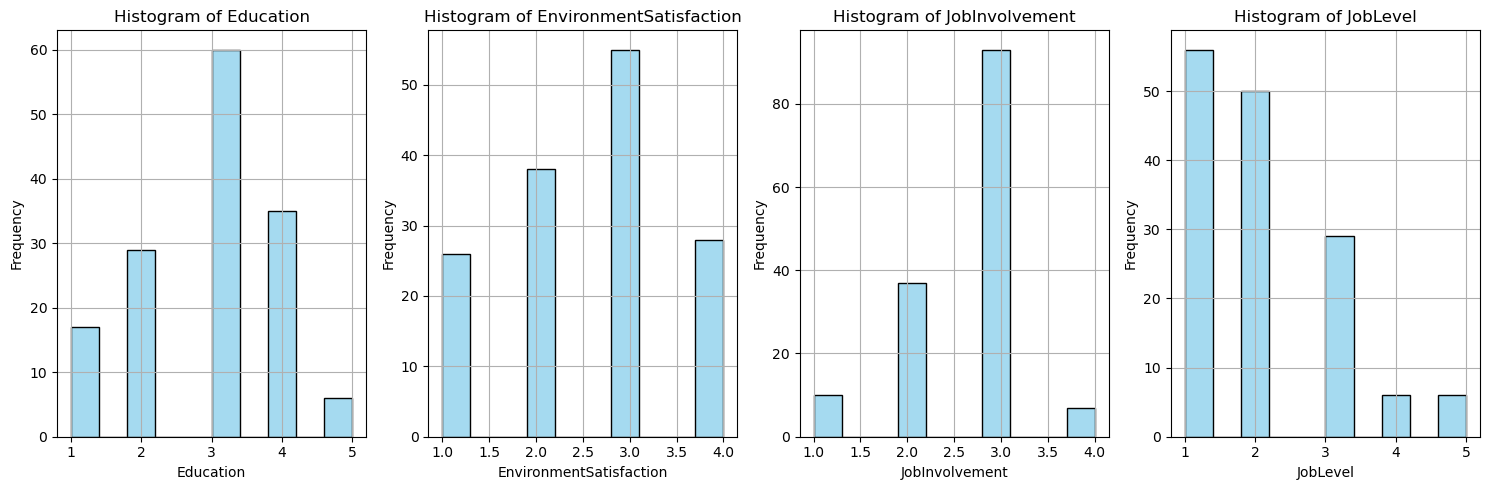

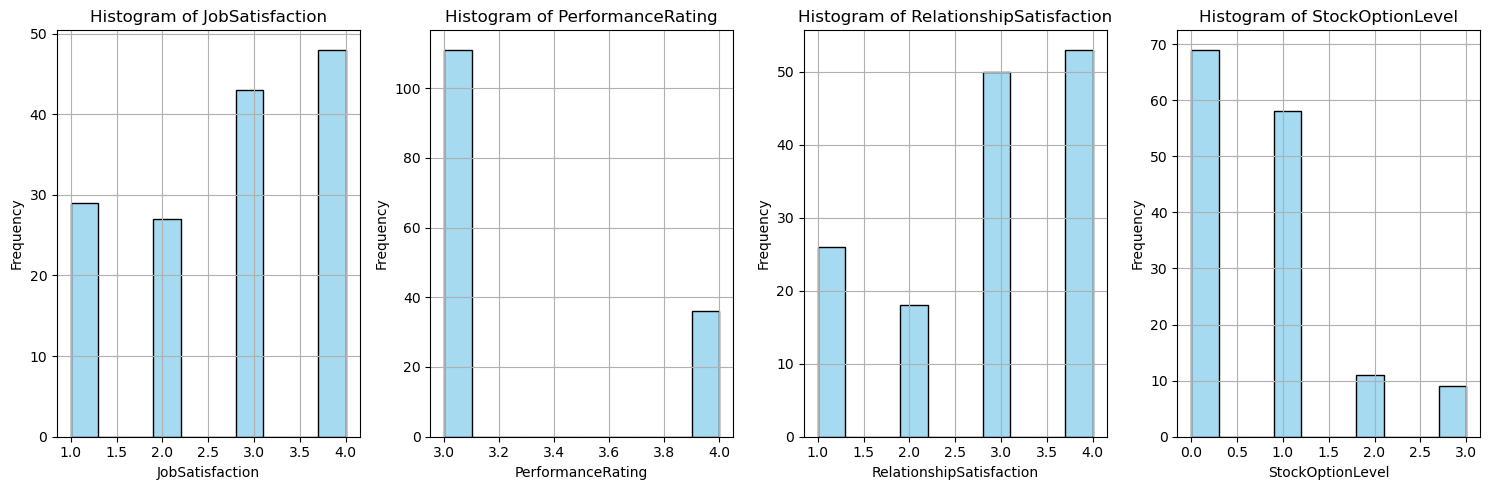

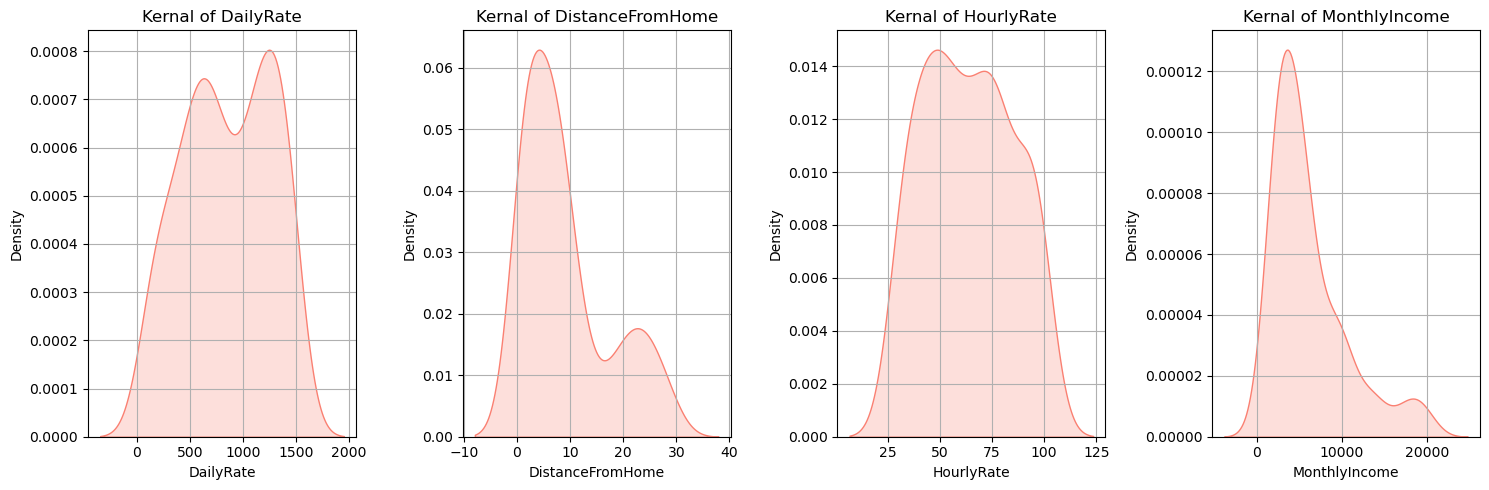

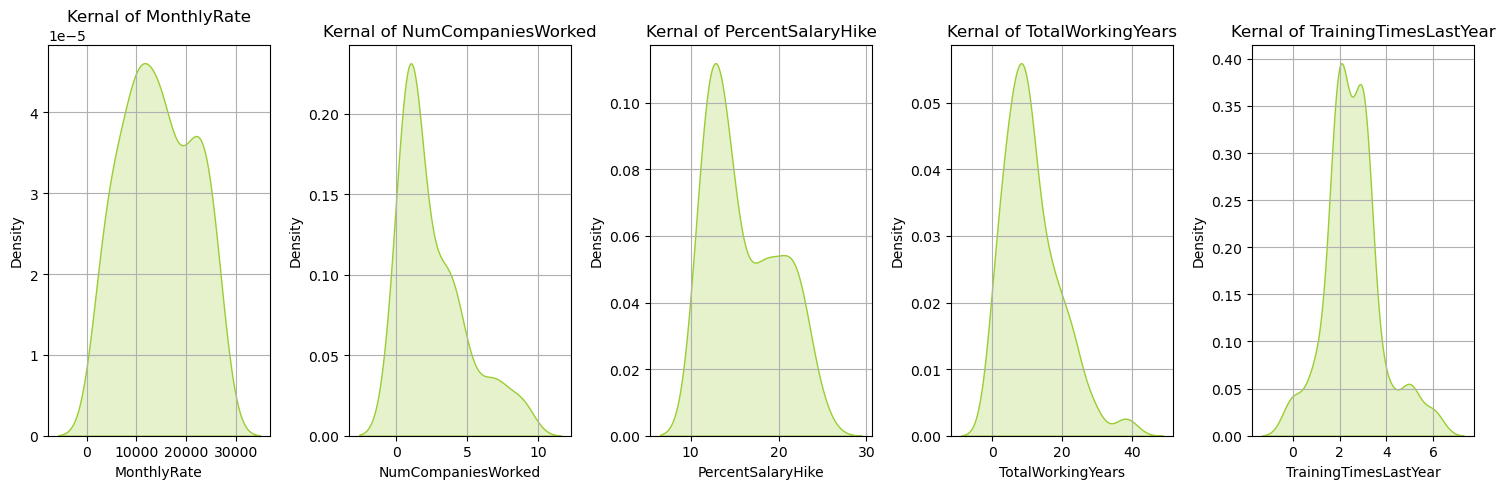

In [94]:
# Define method for ploting histograms for ordinal variables to understand their distribution
def ploting_histogram(list_of_variables, color):
    fig, axes = plt.subplots(1, len(list_of_variables), figsize=(15, 5))
    for i in range(len(list_of_variables)):
        sns.histplot(hr_data_medium_sized[list_of_variables[i]], bins=10, kde=False, color=color, ax=axes[i])
        axes[i].set_title('Histogram of ' + list_of_variables[i])
        axes[i].set_xlabel(list_of_variables[i])
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)
    plt.tight_layout()
    plt.show()

# Define method for ploting kernal for continous variables to understand their distribution
def ploting_kernal(list_of_variables, color):
    fig, axes = plt.subplots(1, len(list_of_variables), figsize=(15, 5))
    for i in range(len(list_of_variables)):
        sns.kdeplot(hr_data_medium_sized[list_of_variables[i]], fill=True, color=color, ax=axes[i])
        axes[i].set_title('Kernal of ' + list_of_variables[i])
        axes[i].set_xlabel(list_of_variables[i])
        axes[i].set_ylabel('Density')
        axes[i].grid(True)
    plt.tight_layout()
    plt.show()

ploting_histogram(['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel'],'skyblue')
ploting_histogram(['JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel'],'skyblue')
ploting_kernal(['DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome'],'salmon')
ploting_kernal(['MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear'],'yellowgreen')

**Interpretation:** The histograms show that most ordinal satisfaction and involvement variables (e.g. Environment Satisfaction, Job Satisfaction, Relationship Satisfaction) are fairly evenly distributed across categories, though slight peaks appear at higher satisfaction levels. Performance Rating is highly imbalanced, with the vast majority of employees being rated as '3', indicating little variance in performance assessment. Job level and education are right-skewed, with most employees in lower hierarchical and educational categories, and fewer in the highest ones.

The kernel density plots confirm that the compensation-related variables (MonthlyIncome, MonthlyRate and DailyRate) are strongly right-skewed, suggesting that the majority of employees earn in the lower to mid ranges, while a small group earns much more. DistanceFromHome is also right-skewed, with most employees living close to their workplace and relatively few commuting long distances. Similarly, TotalWorkingYears and NumCompaniesWorked show long right tails, consistent with a smaller proportion of employees having extended careers or working for many employers.

Interestingly, HourlyRate and DailyRate appear to be more uniformly distributed, while PercentSalaryHike is slightly skewed, centring around 12–15%. The similarity in the shape of related variables, such as MonthlyIncome and MonthlyRate, suggests underlying correlations. Overall, the distributions highlight typical workforce patterns, such as a concentration in lower career stages and compensation brackets, and a skewness in tenure and income. There is also limited variability in standardised performance evaluations.

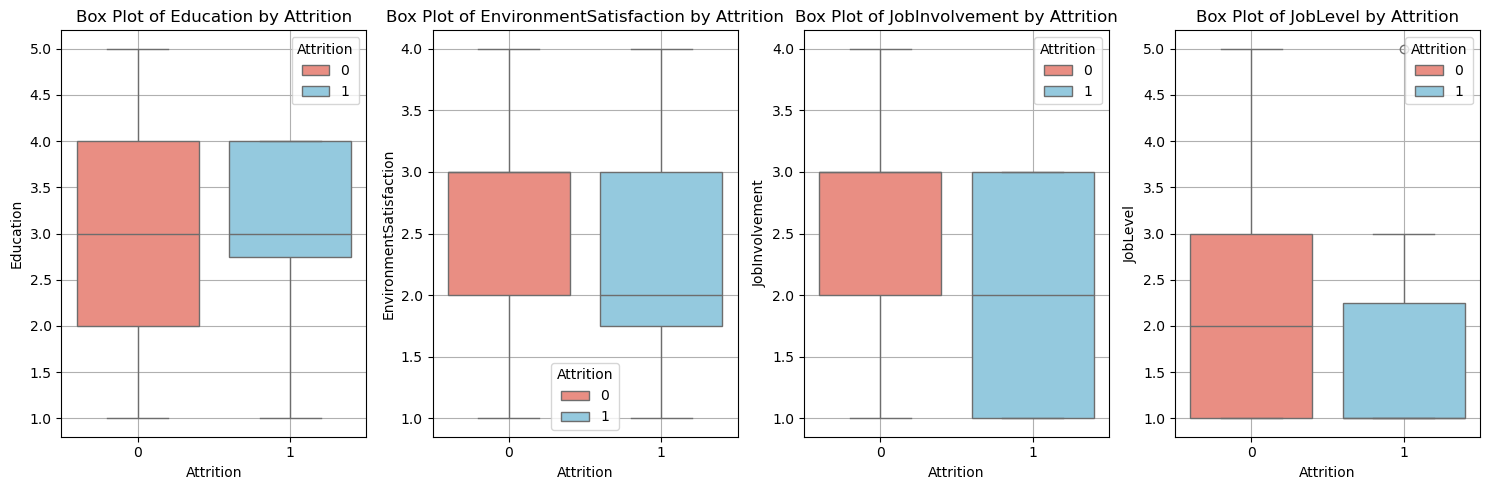

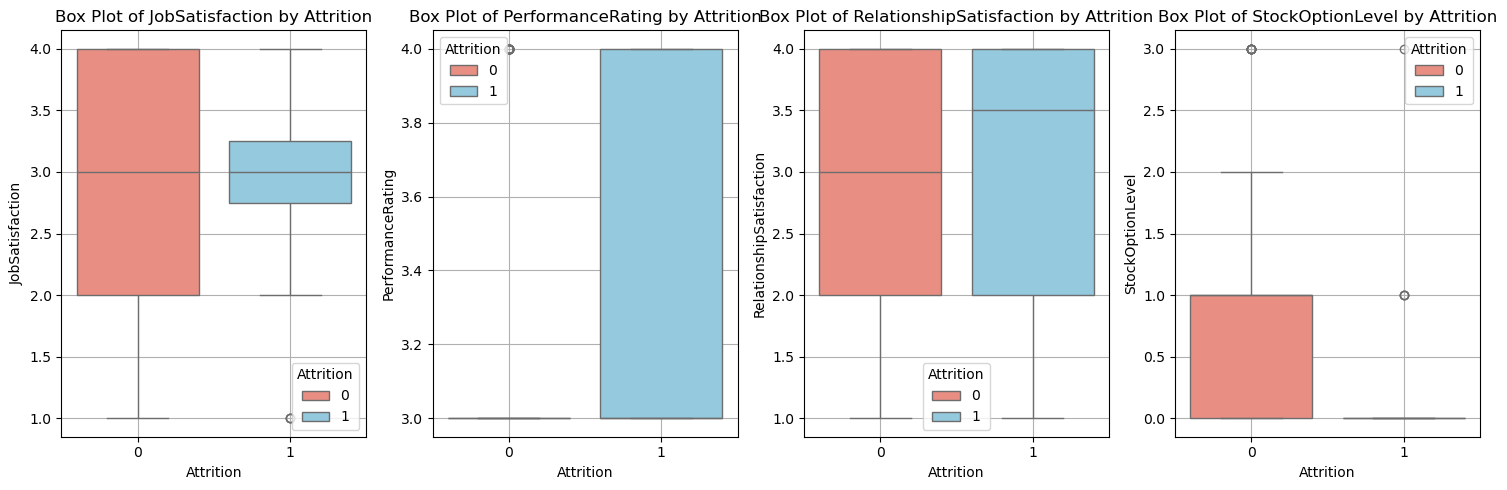

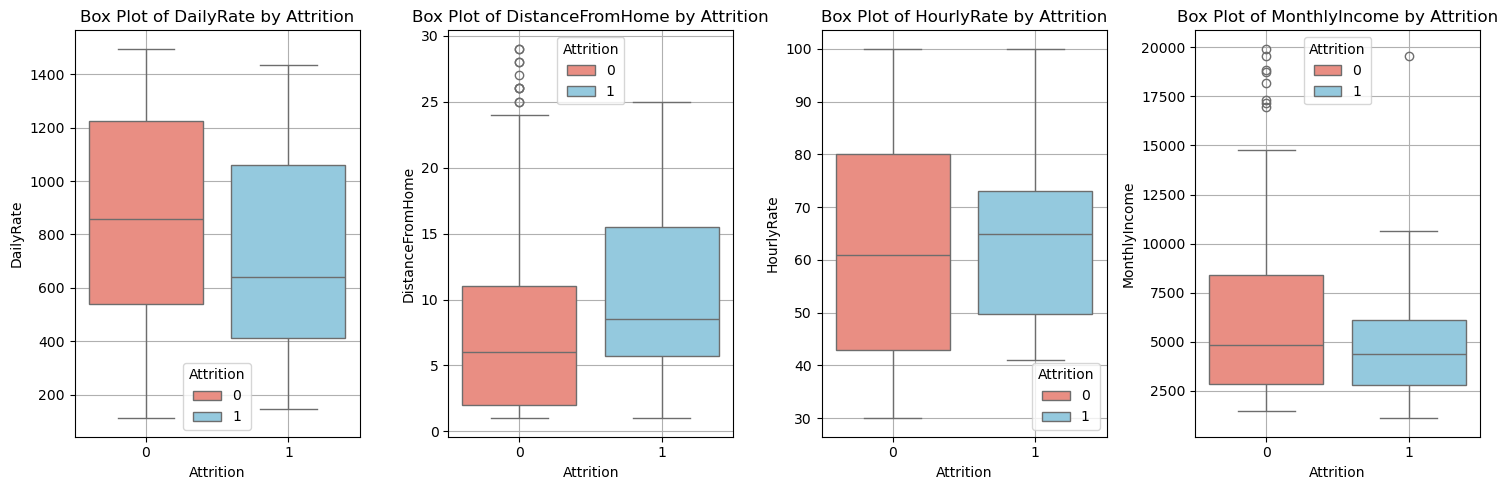

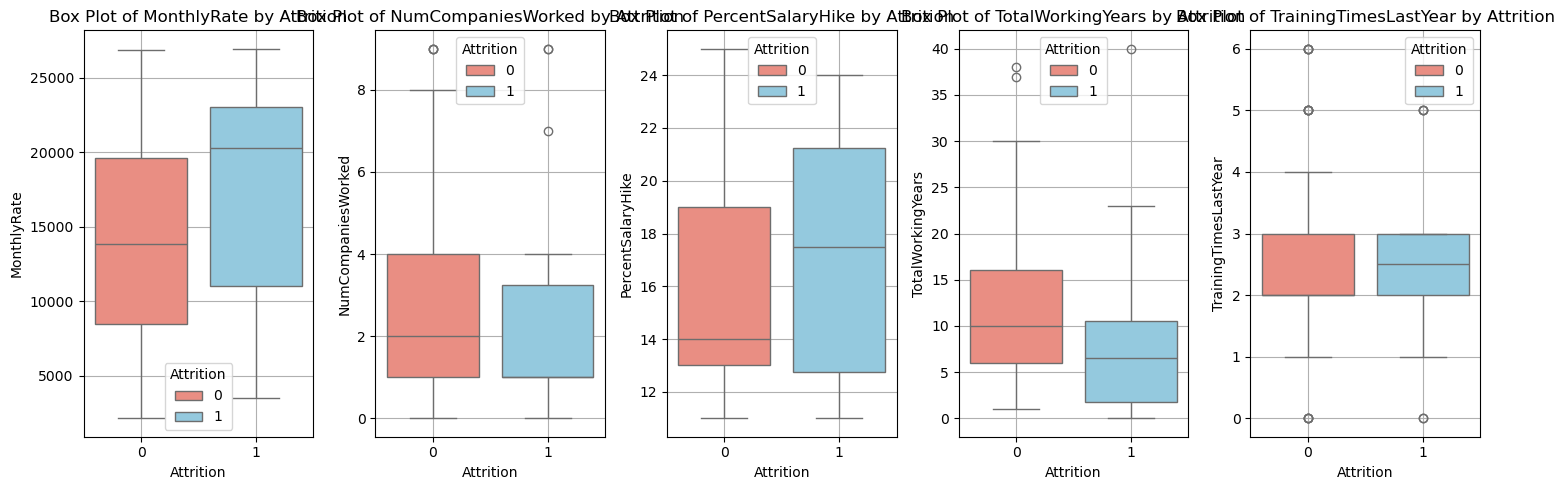

In [95]:
# Box plot for Account Length stratified by Attrition
def boxplot_stratified(list_of_variables, stratified):
    fig, axes = plt.subplots(1, len(list_of_variables), figsize=(15, 5))
    for i in range(len(list_of_variables)):
        sns.boxplot(x=stratified, y=list_of_variables[i], data=hr_data_medium_sized, hue=stratified, ax=axes[i], palette=['salmon', 'skyblue'])
        axes[i].set_title(f'Box Plot of {list_of_variables[i]} by {stratified}')
        axes[i].set_xlabel(stratified)
        axes[i].set_ylabel(list_of_variables[i])
        axes[i].grid(True)
    plt.tight_layout()
    plt.show()       

boxplot_stratified(['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel'],'Attrition')
boxplot_stratified(['JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel'],'Attrition')
boxplot_stratified(['DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome'],'Attrition')
boxplot_stratified(['MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear'],'Attrition')

**Interpretation:** The box plots reveal noticeable differences in various features between employees who stayed with the company and those who left. Those who left the company tend to have lower job satisfaction, job level, monthly income, and total working years, indicating that lower career progression, pay, and tenure are associated with a higher risk of leaving the company. Similarly, employees with higher values for 'Distance from home' and 'Number of companies worked' appear more likely to leave, suggesting that mobility and prior job changes may influence turnover behaviour.
Features such as Environment Satisfaction and Relationship Satisfaction also have slightly lower medians for employees who left, suggesting that workplace satisfaction is a contributing factor. Conversely, Performance Rating exhibits little variation between groups, suggesting that it may not be a strong predictor of attrition.

Outliers are present across many variables, particularly in 'Monthly Income', 'Total Working Years', and 'Percent Salary Hike', reflecting extreme cases such as employees with very long tenure or unusually high salaries. These outliers represent realistic variations in the workforce and may capture important signals of employee subgroups.

Reason for Not Removing Outliers: As all observed values fall within reasonable ranges given the context of the dataset, outliers are not considered erroneous, but rather indicative of meaningful deviations in employee experiences. Removing them could obscure important turnover patterns and reduce the predictive power of the analysis. Keeping them ensures that the model can account for extreme yet realistic workforce behaviours.

## 3.2. <a id='toc3_2_'></a>[Descriptive Statistics of Correlations](#toc0_)

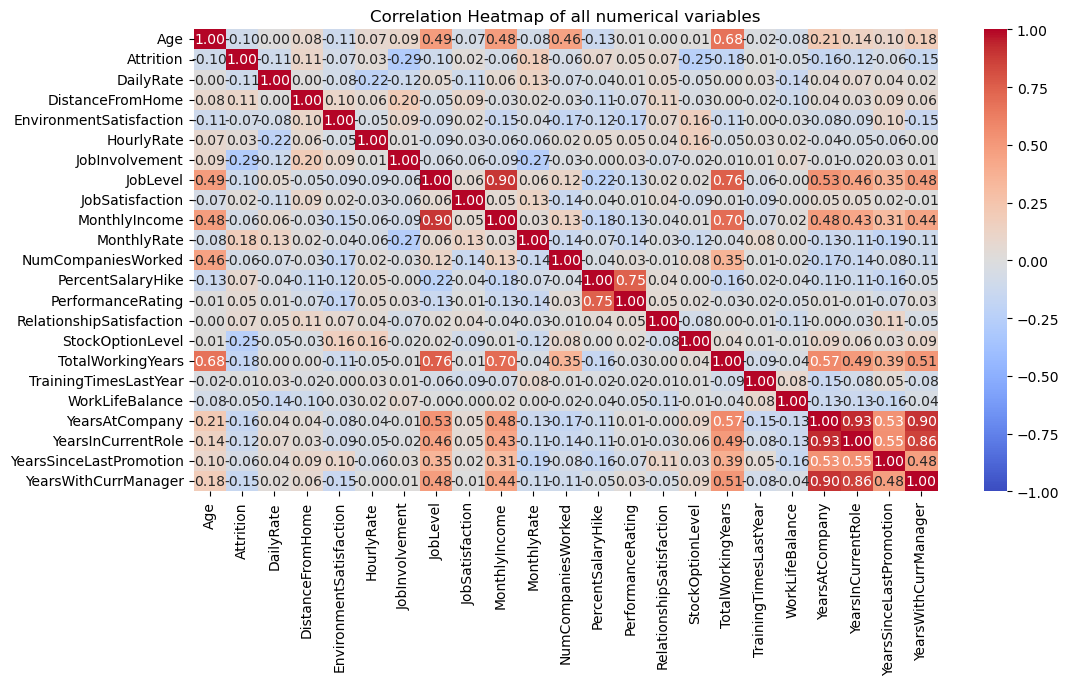

In [96]:
# Drop nominal variables
columns_to_drop = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'JobRole', 'MaritalStatus', 'Gender', 'OverTime', 'Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
numerical_variables = hr_data_medium_sized.drop(columns_to_drop, axis=1)

# Compute the Spearman correlation matrix
correlation_matrix = numerical_variables.corr(method='spearman')

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt=".2f")

# Set the title and labels
plt.title('Correlation Heatmap of all numerical variables')
plt.show()

Interpretation: 

In [97]:
# Zwischencheck auf eine Hypothese testen

Interpretation

# 5. <a id='toc5_'></a>[What factors influence the years at company of attrition employees in medium sized organisations?](#toc0_)

## 5.1. <a id='toc5_1_'></a>[Linear Regression](#toc0_)

    H₀: None of the independent variables have a significant impact on the length of attritioned employees in a medium-sized company.
    H₁: At least one independent variables have a significant impact on the length of attritioned employees in a medium-sized company.

### 5.1.1. <a id='toc5_1_1_'></a>[Model](#toc0_)
CHECK about Point 4 tests
The scatterplots of the correlations between `YearsAtCompany` and the independent variables showed several noteworthy relationships. Based on the correlation heatmap, we can identify that `YearsAtCompany` is strongly correlated with `YearsInCurrentRole` (r = 0.85), `YearsWithCurrManager` (r = 0.84), and `YearsSinceLastPromotion` (r = 0.51). Additionally, there are medium to strong correlations with `TotalWorkingYears` (r = 0.47) and `JobLevel` (r = 0.46).
These results indicate that the time an employee has spent at the company tends to co-vary with their hierarchical position, accumulated work experience, and tenure within their current role and reporting structure. Interestingly, the correlation with `Attrition` is negative but weak (r = –0.19), suggesting that longer tenure is associated with slightly lower attrition risk, though the effect is minor.
Therefore, we will include `YearsInCurrentRole`, `YearsWithCurrManager`, `YearsSinceLastPromotion`, `TotalWorkingYears`, and `JobLevel` as explanatory variables in our regression model when analyzing `YearsAtCompany`. 

This will allow us to test whether these factors have a significant impact on company tenure and to what extent they explain variations in this variable.

In [98]:
# define the model
linear_model = smf.ols(formula='YearsAtCompany ~ YearsInCurrentRole + YearsWithCurrManager + YearsSinceLastPromotion + TotalWorkingYears + JobLevel', data=attritioned_employees_df)
# fit the model
linear_results = linear_model.fit()
# print the results summary
linear_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         YearsAtCompany   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     32.06
Date:                Sat, 04 Oct 2025   Prob (F-statistic):           3.44e-07
Time:                        12:32:54   Log-Likelihood:                -47.461
No. Observations:                  20   AIC:                             106.9
Df Residuals:                      14   BIC:                             112.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.6253      1.589      1.652      0.121      -0.783       6.034
YearsInCurrentRole          1.7877      0.843      2.121      0.052      -0.020       3.596
YearsWithCurrManager       -1.1162      0.910     -1.227      0.240      -3.067       0.835
YearsSinceLastPromotion     0.5521      0.370      1.492      0.158      -0.242       1.346
TotalWorkingYears           0.5870      0.123      4.765      0.000       0.323       0.851
JobLevel                   -3.4986      1.185     -2.951      0.011      -6.041      -0.956
==============================================================================
Omnibus:                        0.662   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.706
Skew:                          -0.265   Prob(JB):                        0.703
Kurtosis:                       2.247   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation** 
In this model we included the variables that showed the strongest associations with YearsAtCompany in the EDA. Four predictors are statistically reliable: YearsInCurrentRole (β = 0.5868, p < .001), YearsWithCurrManager (β = 0.4093, p < .001), YearsSinceLastPromotion (β = 0.2557, p = .002) and TotalWorkingYears (β = 0.3038, p < .001). Their 95% CIs do not include zero, so we reject the null hypothesis of “no effect” for these coefficients. Interpreted at face value, one additional year in current role is associated with ≈0.59 additional years at the company (holding the other variables constant); analogous marginal increases apply to the other significant predictors (≈0.41, 0.26, and 0.30 years, respectively). In contrast, JobLevel is not significant (β = 0.0913, p = .742; CI spans zero) and provides no additional explanatory value once tenure-related variables are controlled.
The model fit is strong: R² = .805 (Adj. R² = .801), indicating that about 80% of the variance in YearsAtCompany is explained by the included predictors. This is consistent with the conceptual overlap among tenure-related variables.
Assumption checks temper this optimism. Residual diagnostics indicate clear deviations from normality (Omnibus and Jarque–Bera both p < .001; skew = 1.56; kurtosis = 13.87), which can inflate or deflate p-values. The Durbin–Watson statistic (2.06) suggests no material autocorrelation, and the condition number (29.6) points to moderate, but not extreme, multicollinearity—plausible given the conceptual proximity of tenure measures. Pending a formal residuals-vs.-fitted inspection, heteroscedasticity cannot be ruled out.
Bottom line: We find robust positive relationships of role tenure, manager tenure, time since last promotion, and overall work experience with YearsAtCompany, while job level adds no independent signal. Given the non-normal residuals (and potential heteroscedasticity), inference should be corroborated with robustness checks (e.g., HC3/White robust standard errors, influence diagnostics, and, if needed, model respecification or transformation).

### 5.1.2. <a id='toc5_1_2_'></a>[Assumptions Checking](#toc0_)

In [99]:
# Add predictions and residuals to the churned customer DataFrame
attritioned_employees_df.loc[:, 'predictions'] = linear_results.predict()
attritioned_employees_df.loc[:, 'residuals'] = linear_results.resid  # Compute residuals (actual - predicted values)

/var/folders/y3/q1l5v5v9335f6lmlzn4g_qjw0000gn/T/ipykernel_16858/1167859709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attritioned_employees_df.loc[:, 'predictions'] = linear_results.predict()
/var/folders/y3/q1l5v5v9335f6lmlzn4g_qjw0000gn/T/ipykernel_16858/1167859709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attritioned_employees_df.loc[:, 'residuals'] = linear_results.resid  # Compute residuals (actual - predicted values)


#### 5.1.2.1. <a id='toc5_1_2_1_'></a>[Linearity](#toc0_)
The relationship between predicted values and actual values should be linear, and the residuals should have no obvious pattern. 

#### 5.1.2.2. <a id='toc5_1_2_2_'></a>[Homoscedacsity](#toc0_)
1. To assess whether our error terms (residuals) have similar variance, we can plot the residuals vs. the predicted and observed values and see if there are odd patters. 
2. In the case of homscedasticity, the residuals would vary equally for all predicted and actual values, i.e., they should follow a line. 

#### 5.1.2.3. <a id='toc5_1_2_3_'></a>[Normality of Residuals](#toc0_)
A Q-Q plot helps to see if residuals are normally distributed. Points should follow the straight line.

#### 5.1.2.4. <a id='toc5_1_2_4_'></a>[Multicollinearity](#toc0_)
Regarding to `Multicollinearity`,  we don't use high correlated and depended variables in the model like Total day minutes and Total day charge, however, to ensure this assumption is satisfied we compute the Variance Inflation Factor.

In [100]:
# INSTRUCTION: Compute the VIF for all variables in the model

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe of independent variables
X = linear_results.model.exog  # independent variables from the regression model

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = linear_results.model.exog_names

print(vif)

   VIF Factor                 features
0    5.246097                Intercept
1   23.239889       YearsInCurrentRole
2   11.786464     YearsWithCurrManager
3    5.843007  YearsSinceLastPromotion
4    3.066070        TotalWorkingYears
5    3.385434                 JobLevel


#### 5.1.2.5. <a id='toc5_1_2_5_'></a>[Independence of Errors (autocorrelation of errors)](#toc0_)
The Durbin-Watson test checks for autocorrelation in residuals. Values between 1.5 and 2.5 are acceptable.

We can read this value of the regression table or we compute it by using the following code:

In [101]:
# Perform the Durbin-Watson test
dw_test = durbin_watson(attritioned_employees_df['residuals'])
print(f'Durbin-Watson Test: {dw_test}')

Durbin-Watson Test: 1.871696837361524


**Interpretation** The Durbin–Watson statistic is 1.87, which falls within the acceptable range of 1.5 to 2.5. This indicates that there is no significant autocorrelation among the residuals. Therefore, the assumption of independence of errors is satisfied, suggesting that the residuals are randomly distributed and not systematically related over observations.

After validating the following assumptions, we can conclude: FIXME